In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns

In [3]:
main_path = r'/Users/dariahasin/Documents/Technion/2022b/Final project'
networks_path = os.path.join(main_path, 'Merged_networks_table_for_pandas.xls')
distance_and_z_path = os.path.join(main_path, 'distance-and-r_z.xlsx')
tests_path = os.path.join(main_path, 'MRI_TAU_specific_tests_per_subject_with_conditions.xlsx')

graphs_path = os.path.join(main_path, 'graphs_networks_vs_reading_tests')
if not os.path.exists(graphs_path):
    os.mkdir(graphs_path)

df_task1 = pd.read_excel(networks_path, 'Task1').iloc[:44, :]
df_task2 = pd.read_excel(networks_path, 'Task2').iloc[:44, :]

df_tests = pd.read_excel(tests_path).iloc[:, 1:]
df_distance_and_z = pd.read_excel(distance_and_z_path)

In [4]:
distance = df_distance_and_z['distance'].to_numpy(dtype='float64')
z_r = df_distance_and_z['r_z'].to_numpy(dtype='float64')

Conners_Self_T_score = df_tests['Conners_Self_T_score'].to_numpy(dtype='float64')
weights = np.ones(len(Conners_Self_T_score)) - Conners_Self_T_score*0.01
Listening_Comprehension_score = df_tests['Listening_Comprehension_score'].to_numpy(dtype='float64')
Listening_Plus_Images_Comprehension_score = df_tests['Listening_Plus_Images_Comprehension_score'].to_numpy(dtype='float64')
Child_WordReading = df_tests['Child_WordReading_exact_SD_accuracy'].to_numpy(dtype='float64')

tests = df_tests.columns.drop(['Conners_Self_T_score', 'Listening_Comprehension_score', 'Listening_Plus_Images_Comprehension_score'])
tests_arr = []

for test in tests:
    tests_arr.append(df_tests[test].to_numpy(dtype='float64'))
    
df_task1_values = df_task1.iloc[:44, 1:]
df_task2_values = df_task2.iloc[:44, 1:]
tests

Index(['Child_WordReading_exact_SD_accuracy'], dtype='object')

In [23]:
def calc_plot_WLS(x, y, w, color, label):
    WLS = LinearRegression()
    WLS.fit(x.reshape(-1, 1), y, sample_weight=weights)
    xp = np.linspace(np.min(x), np.max(x))
    slope = WLS.coef_[0]
    intercept = WLS.intercept_
    r_squered = WLS.score(x.reshape(-1, 1), y, sample_weight=weights)
    
    y_small = y[weights < 0.4]
    x_small = x[weights < 0.4]
    y_large = y[weights >= 0.4]
    x_large = x[weights >= 0.4]
    
    plt.plot(x_small, y_small, '.', color=color)
    plt.plot(x_large, y_large, 'o', color=color)
#     color='dodgerblue'
#     plt.plot(x, y, '.', color=color)
    plt.plot(xp, xp*slope+intercept, color=color, label=label)
    plt.legend()
#     plt.text(np.min(x), np.min(y), f'r squared = {np.round(r_squered, 5)}', color=color)
    
    return slope, intercept, r_squered

### Scores after the scan

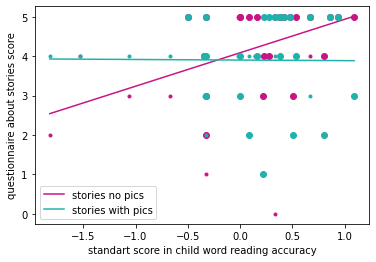

In [24]:
plt.figure()

test_data = Child_WordReading
_, _, r_squered_no_pics = calc_plot_WLS(test_data, Listening_Comprehension_score, weights, color='mediumvioletred', label='stories no pics')
s, _, r_squered_pics = calc_plot_WLS(test_data, Listening_Plus_Images_Comprehension_score, weights, color='lightseagreen', label='stories with pics')


plt.xlabel(f'standart score in child word reading accuracy')
plt.ylabel(f'questionnaire about stories score')
plt.savefig(os.path.join(r'/Users/dariahasin/Documents/Final project/tiff_images', f'scores_after_scan.tiff'))

In [ ]:
tests_path = os.path.join(main_path, 'MRI_TAU_specific_tests_per_subject.xlsx')
df_tests = pd.read_excel(tests_path).iloc[:, 1:]

Conners_Self_T_score = df_tests['Conners_Self_T_score'].to_numpy(dtype='float64')
weights = np.ones(len(Conners_Self_T_score)) - Conners_Self_T_score*0.01
tests = df_tests.columns.drop(['Conners_Self_T_score'])
tests_arr = []

for test in tests:
    tests_arr.append(df_tests[test].to_numpy(dtype='float64'))
    
df_task1_values = df_task1.iloc[:44, 1:]
df_task2_values = df_task2.iloc[:44, 1:]

##### Networks vs tests - two graphs per network

/Users/dariahasin/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


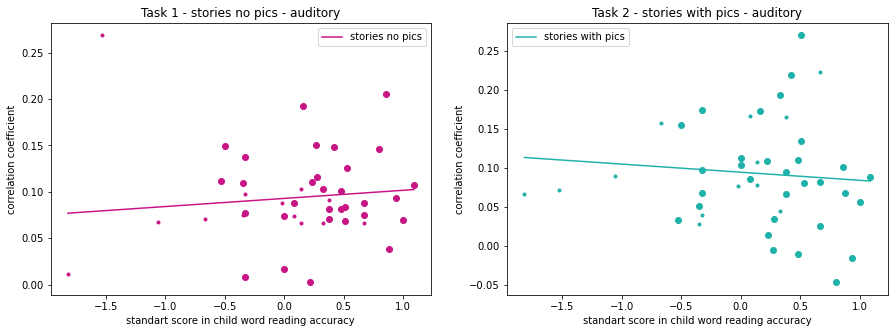

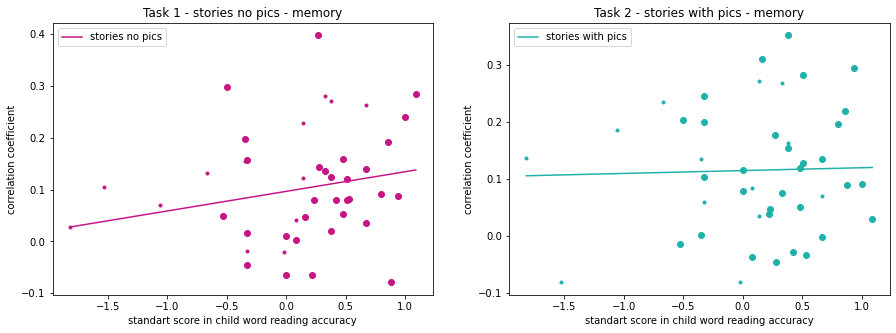

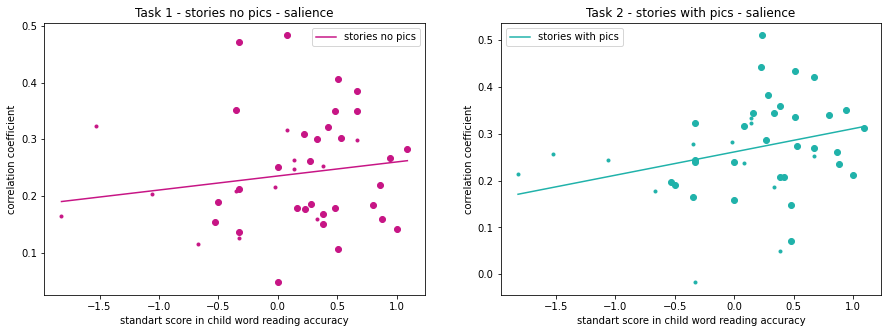

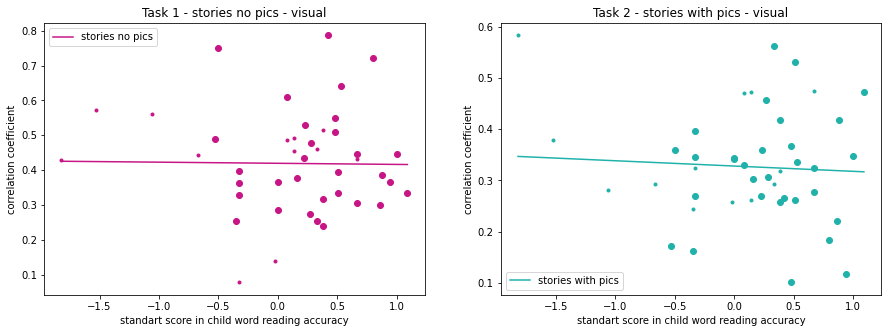

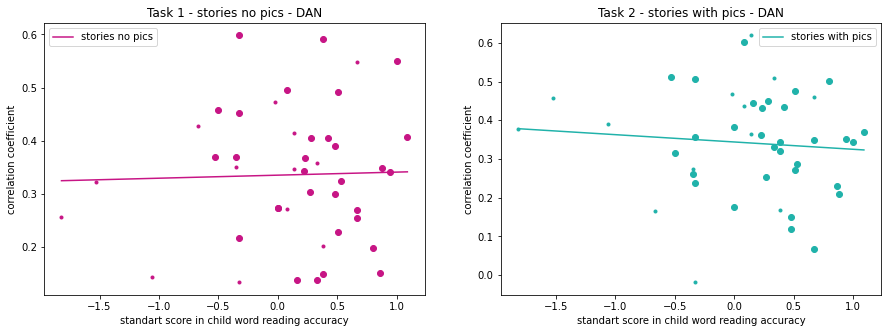

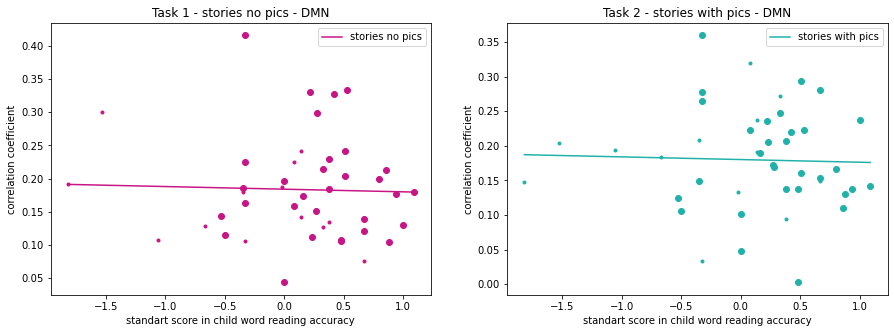

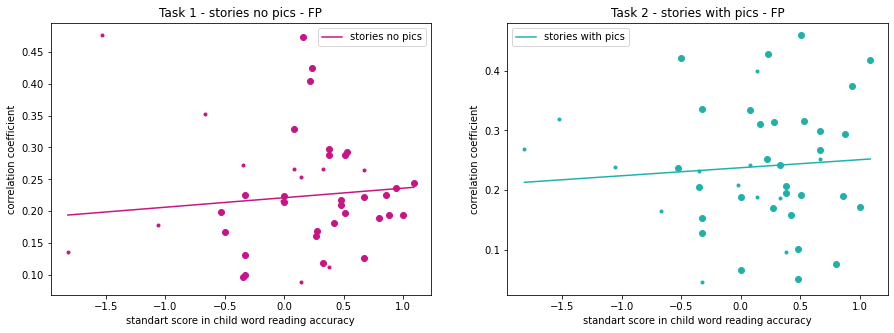

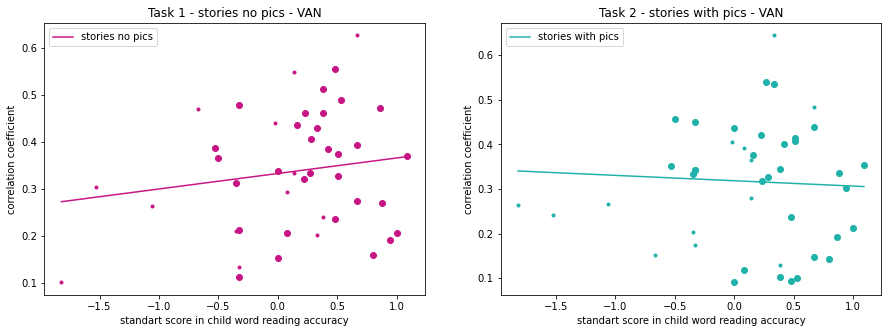

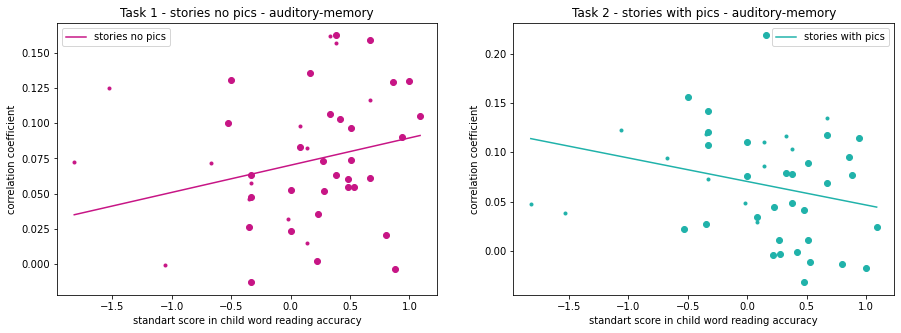

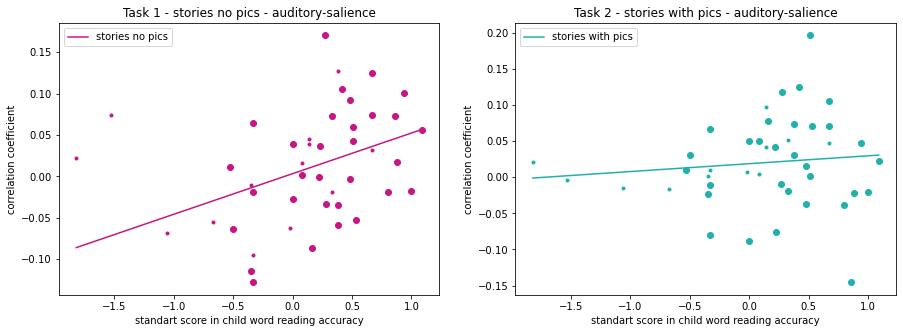

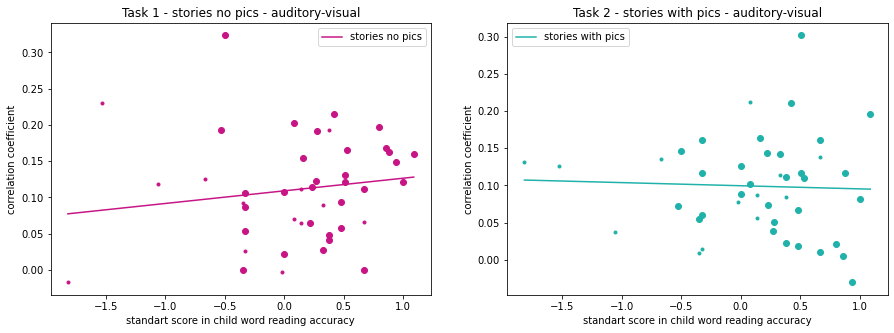

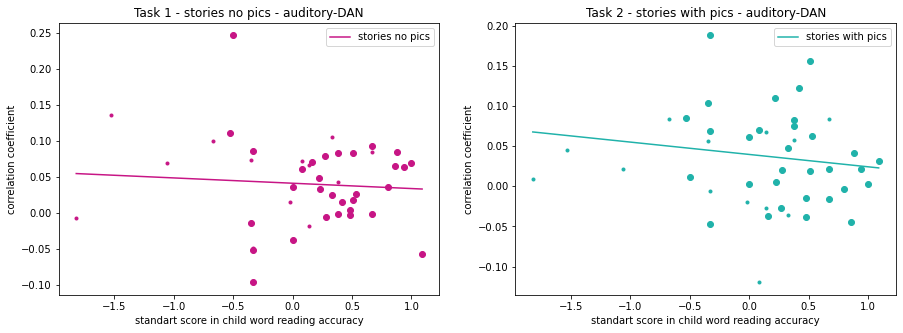

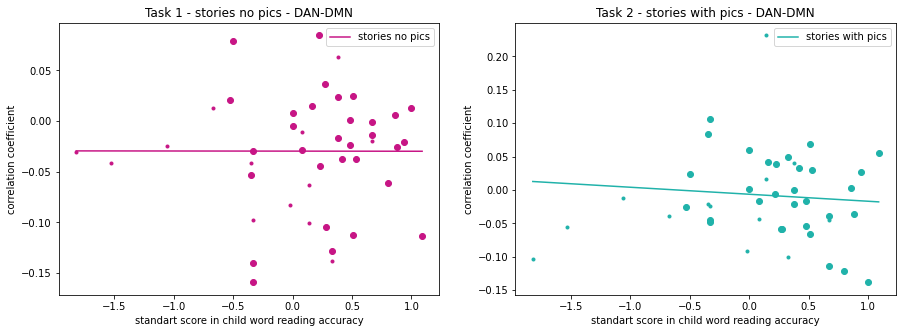

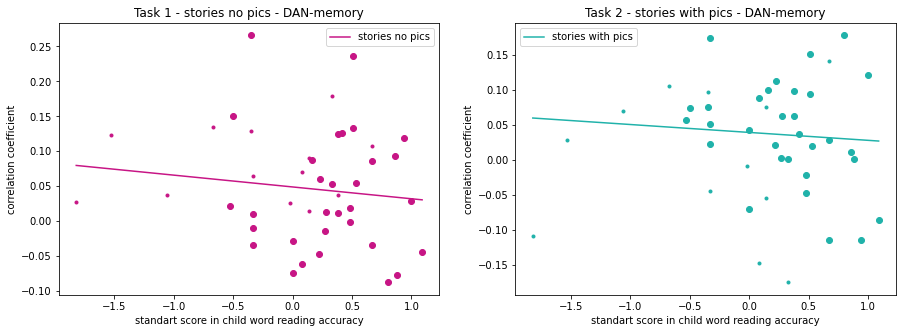

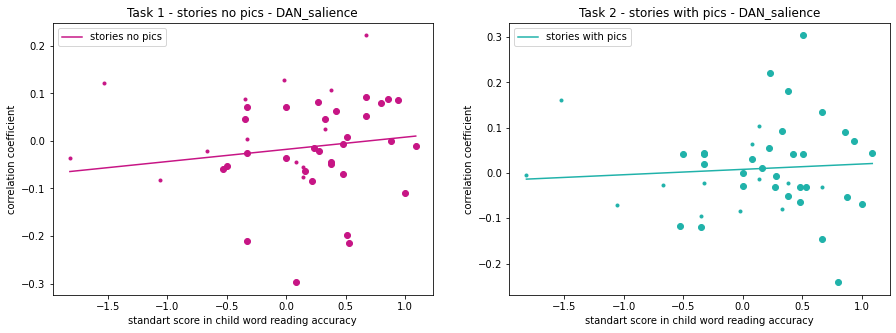

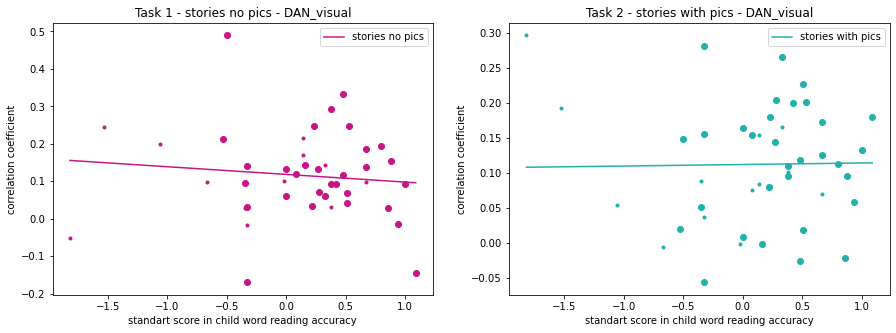

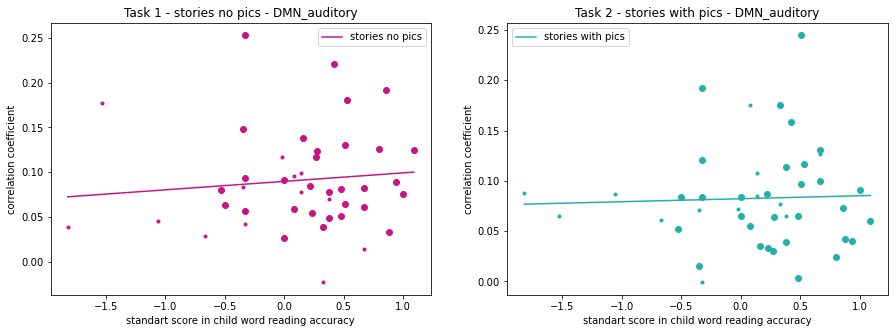

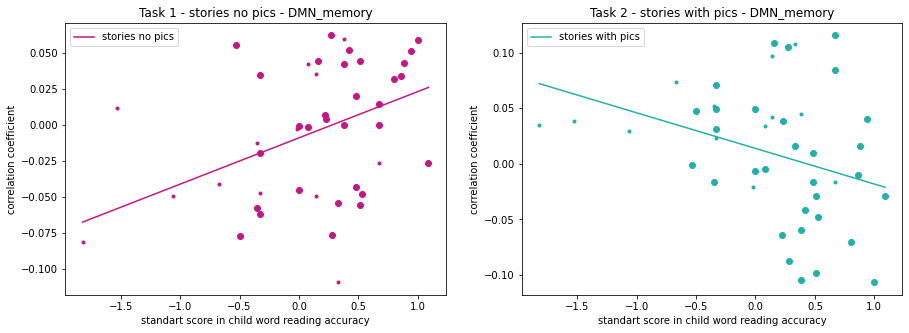

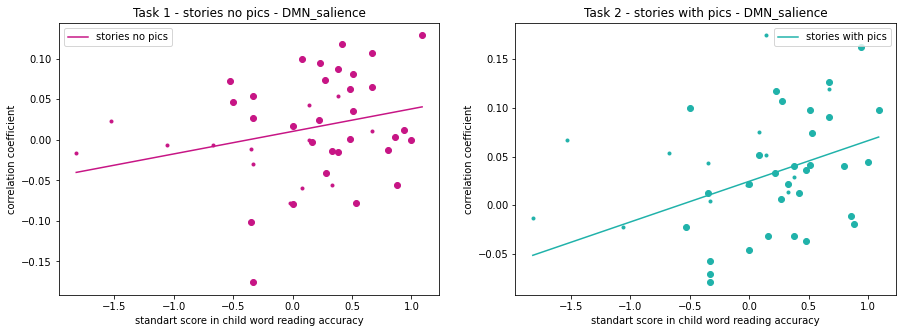

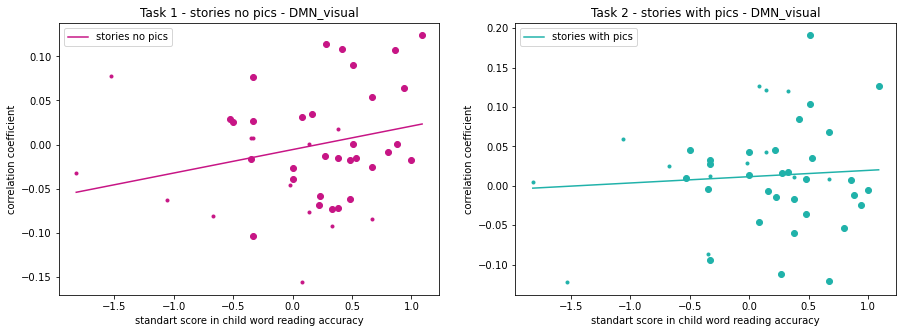

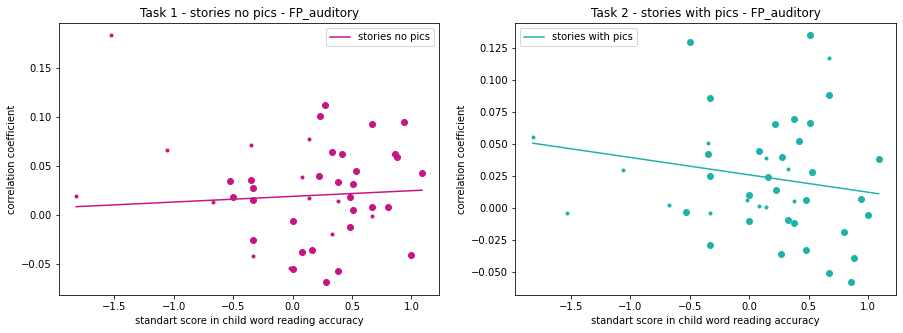

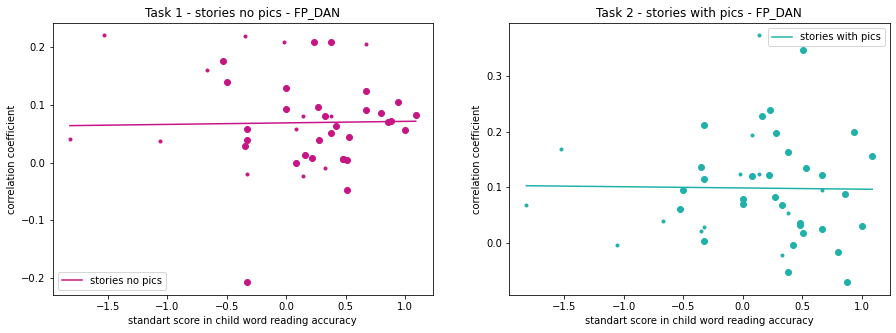

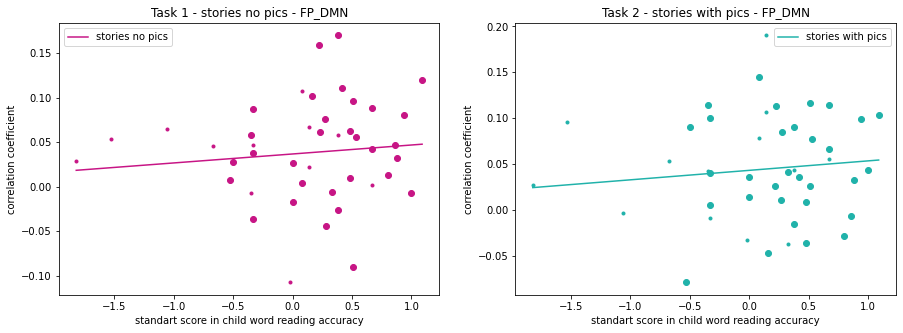

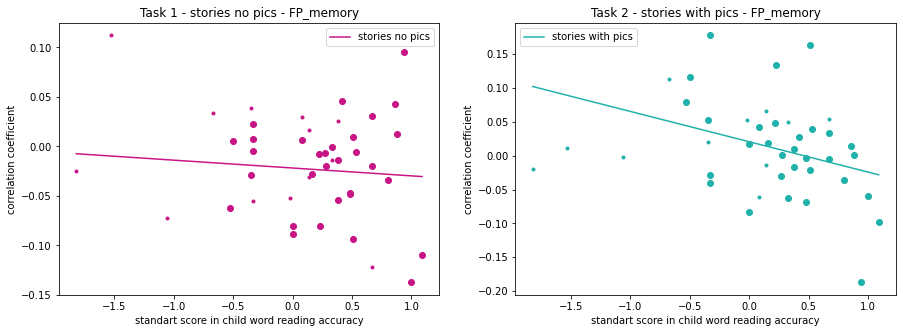

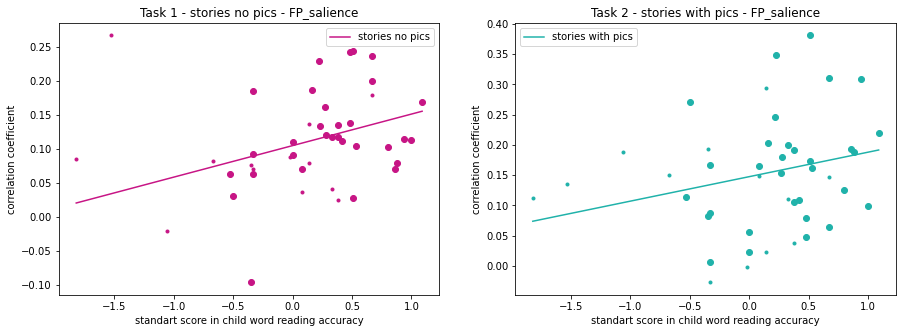

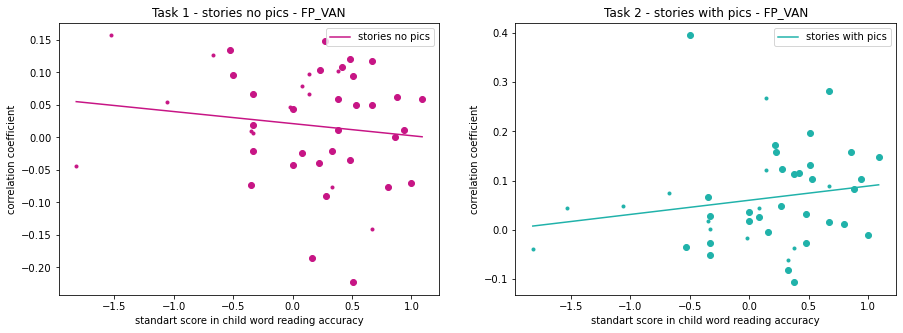

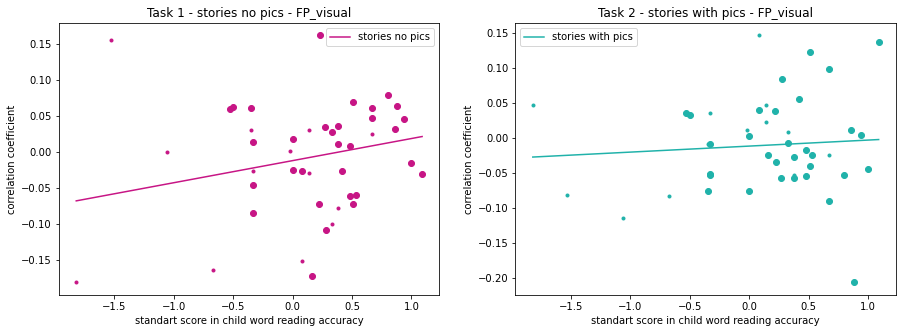

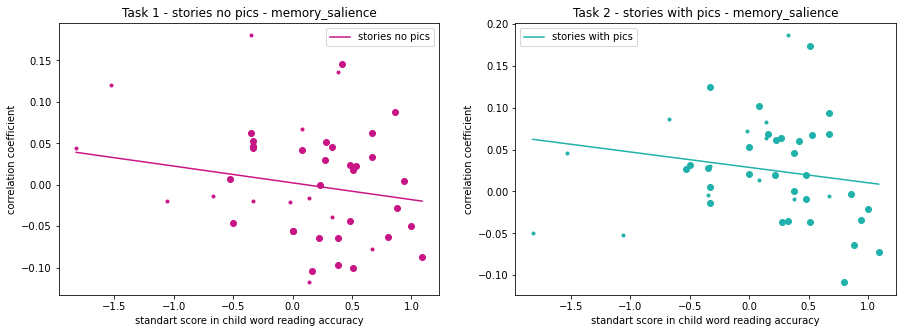

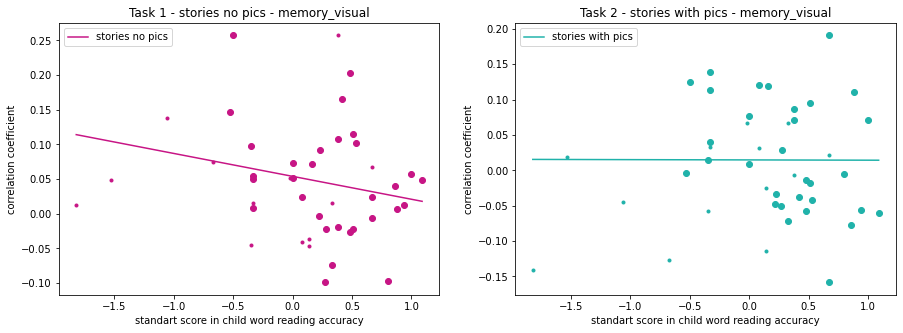

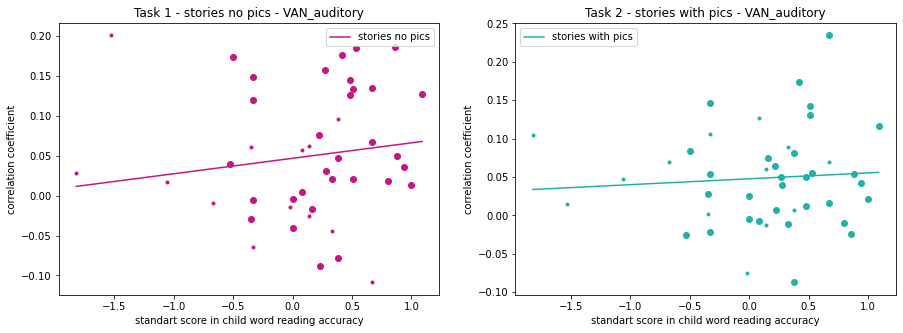

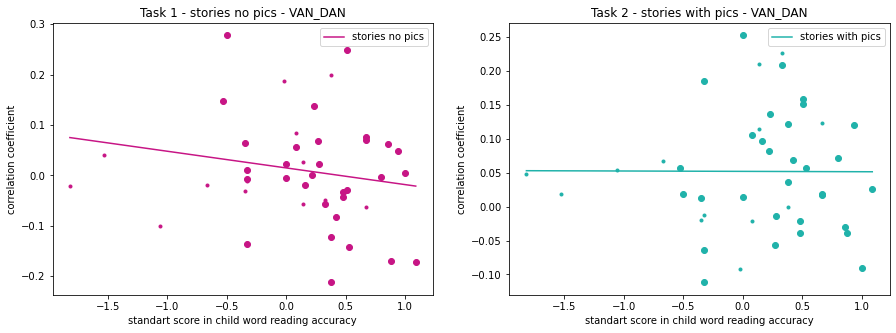

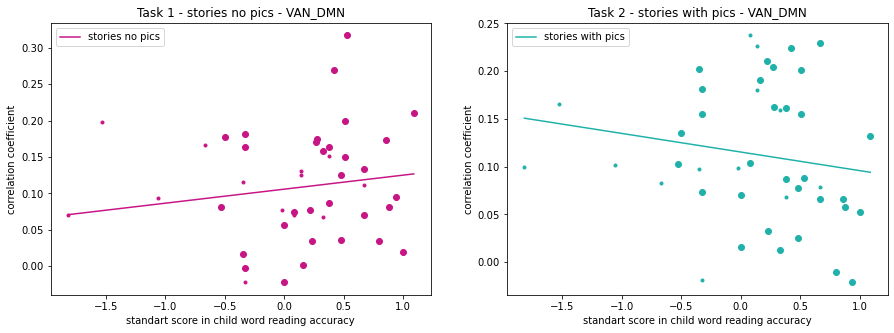

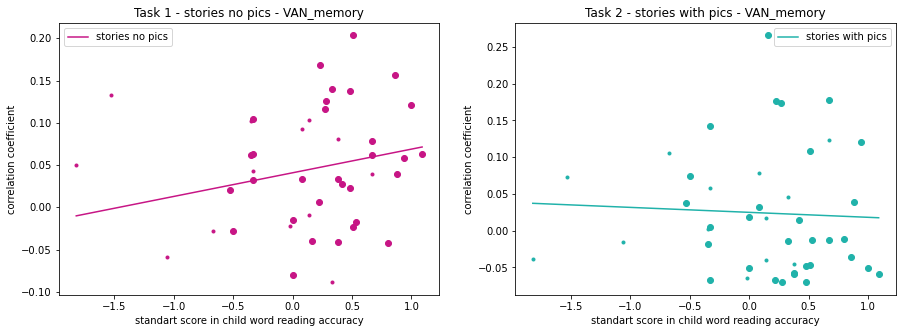

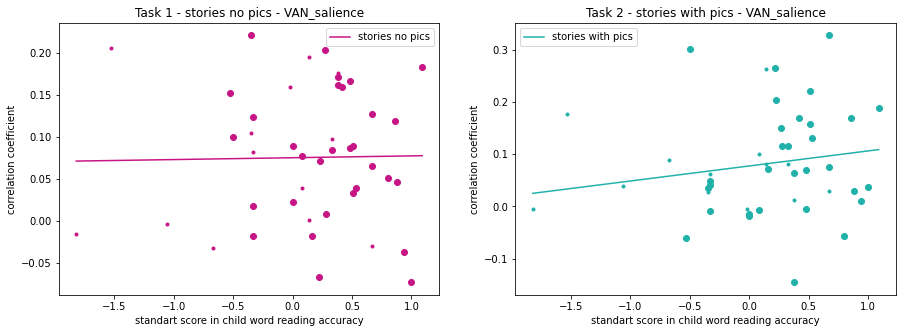

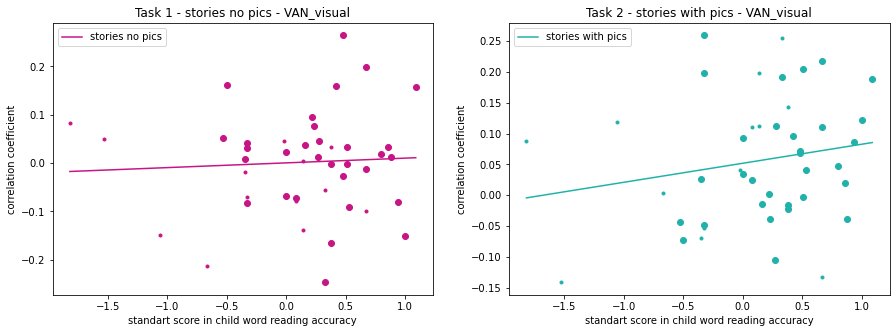

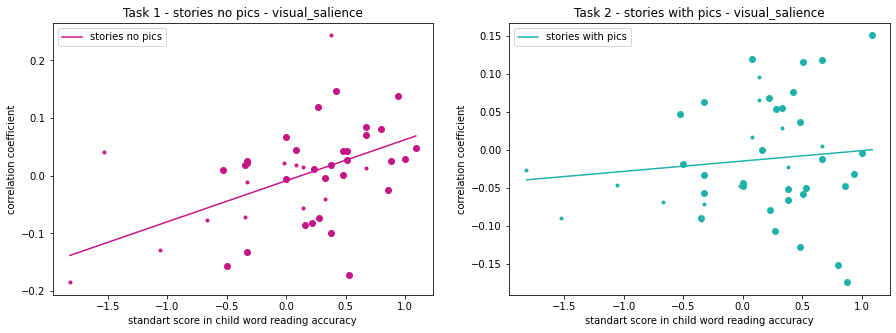

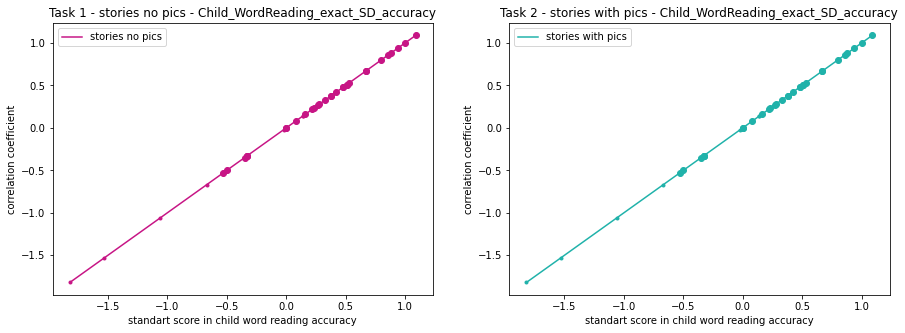

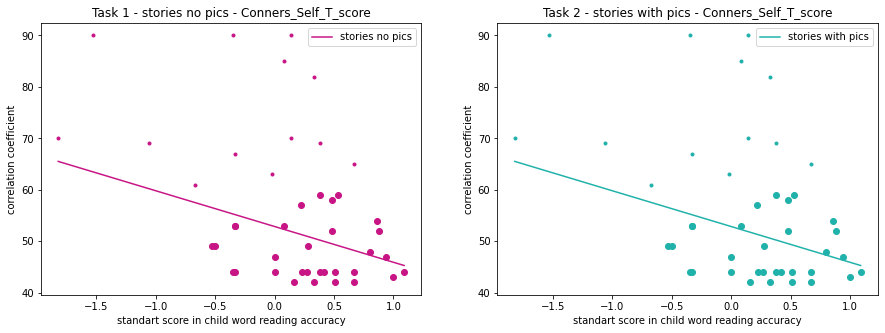

In [52]:
networks = df_task1_values.columns
coef_dict = []

for network in networks:
        
    one_column_task1 = df_task1_values.loc[:, network].to_numpy(dtype='float64')
    one_column_task2 = df_task2_values.loc[:, network].to_numpy(dtype='float64')
    
    for idx, test in enumerate(tests):
        test_data = tests_arr[idx]
        
        fig = plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)

        slope1, intercept1, r_squered1 = calc_plot_WLS(test_data, one_column_task1, weights, 'mediumvioletred', 'stories no pics')

        plt.xlabel(f'standart score in child word reading accuracy')
        plt.ylabel(f'correlation coefficient')
        plt.title(f'Task 1 - stories no pics - {network}')

        plt.subplot(1,2,2)

        slope2, intercept2, r_squered2 = calc_plot_WLS(test_data, one_column_task2, weights, 'lightseagreen', 'stories with pics')
        
        plt.xlabel(f'standart score in child word reading accuracy')
        plt.ylabel(f'correlation coefficient')
        plt.title(f'Task 2 - stories with pics - {network}')
    
        corr = np.sqrt(abs(slope1*slope2))
        
        if slope1*slope2 < 0:
            corr = -corr

        plt.savefig(os.path.join(graphs_path, f'{network}_combined.jpeg'))
        coef_dict.append({'network': network,
                          'slope_task1': slope1,
                          'intercept_task1': intercept1,
                          'r_squered1': r_squered1,
                          'slope_task2': slope2,
                          'intercept_task2': intercept2,
                          'r_squered2': r_squered2,
                          'corr': corr
                         })

columns = ['network', 'slope_task1', 'intercept_task1', 'slope_task2', 'r_squered1', 'intercept_task2', 'r_squered2', 'corr']
df_coef = pd.DataFrame(coef_dict, columns=columns)
df_coef.to_excel(os.path.join(graphs_path, 'coef_between_tasks.xlsx'))

### Networks vs tests - one graph per network

/Users/dariahasin/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


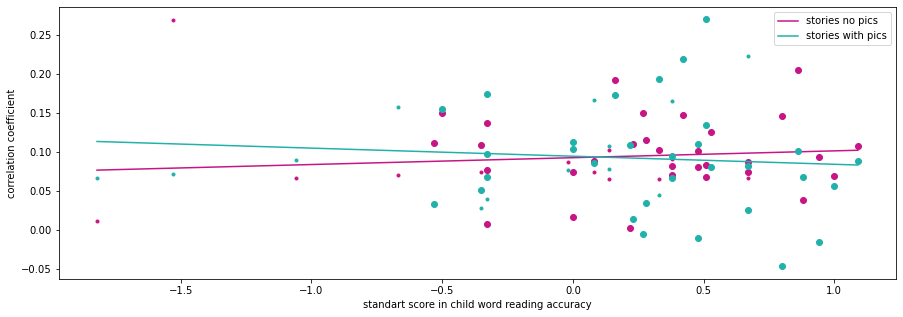

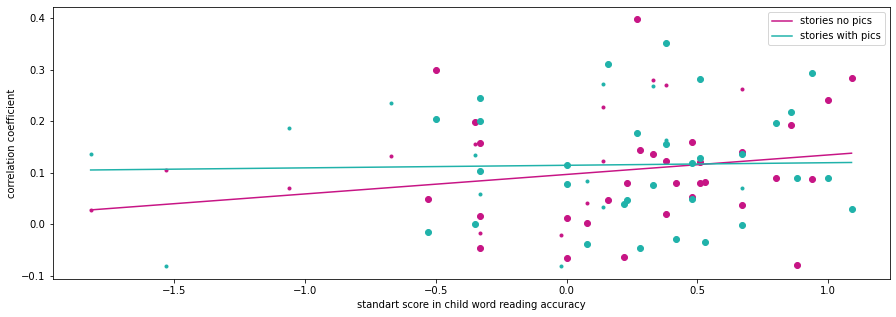

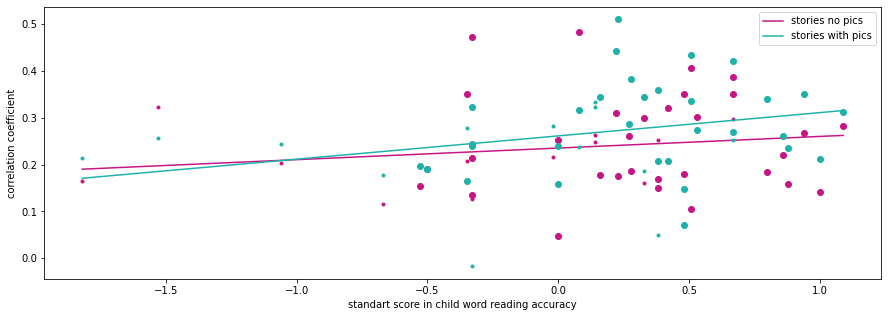

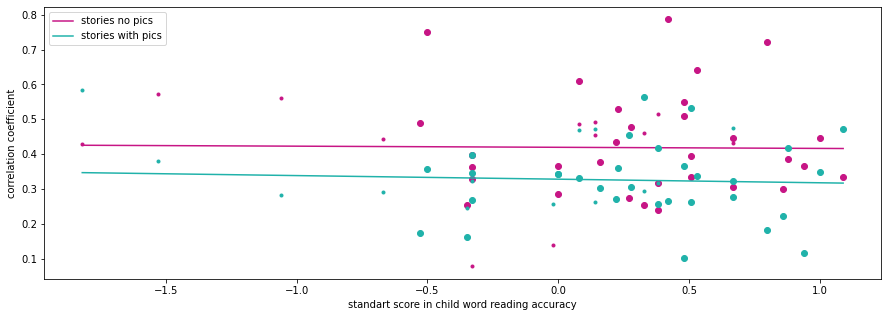

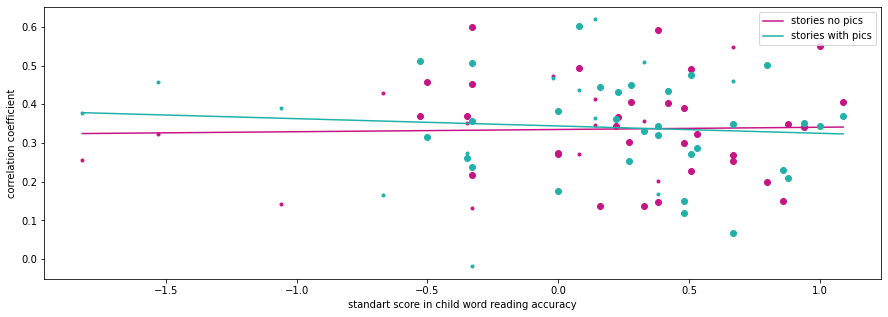

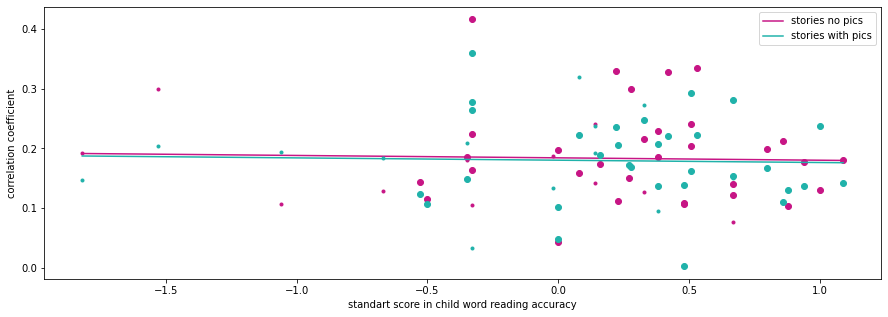

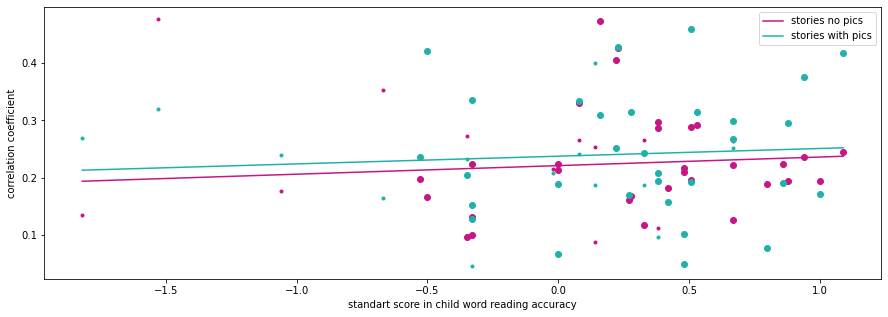

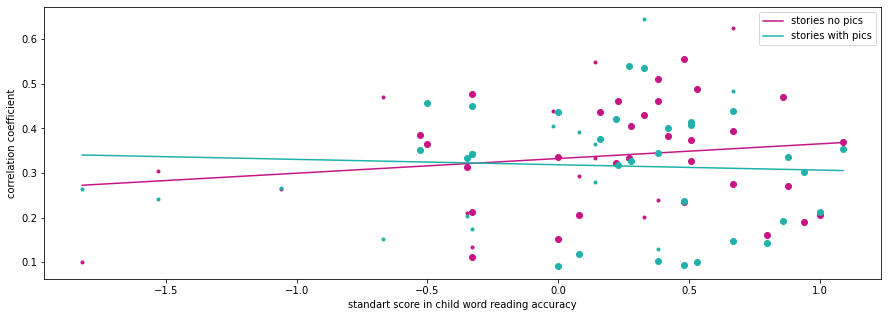

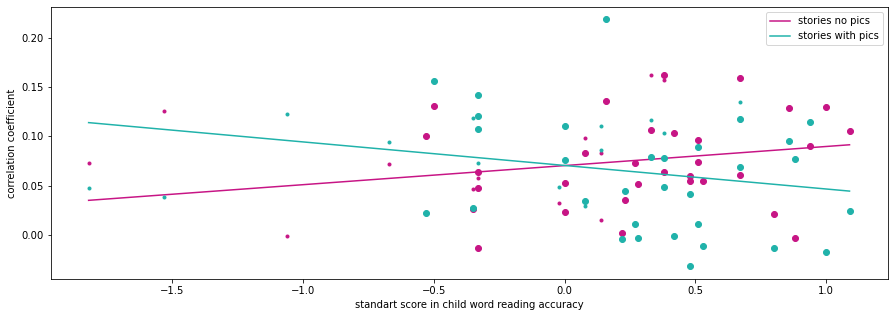

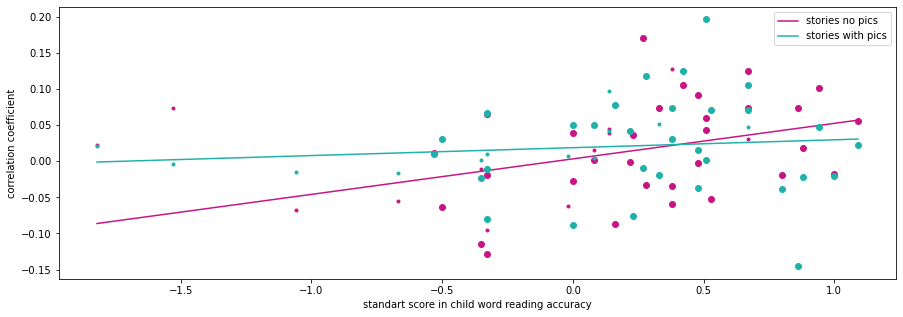

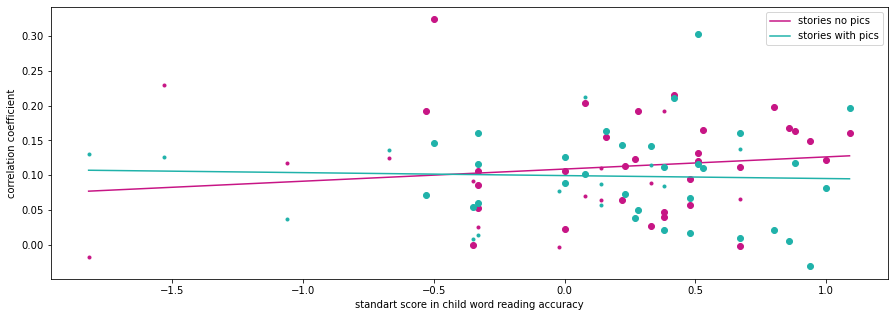

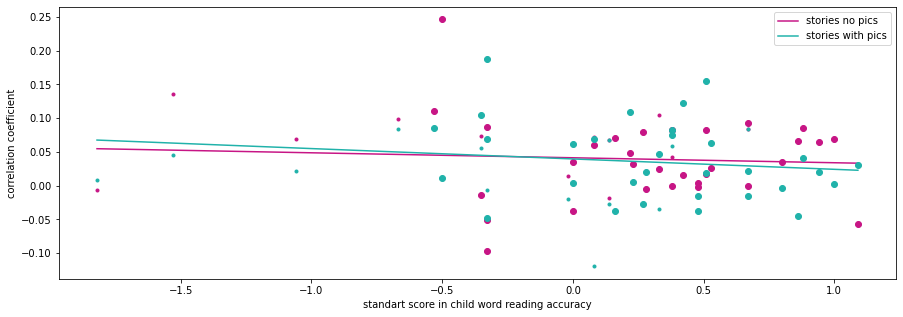

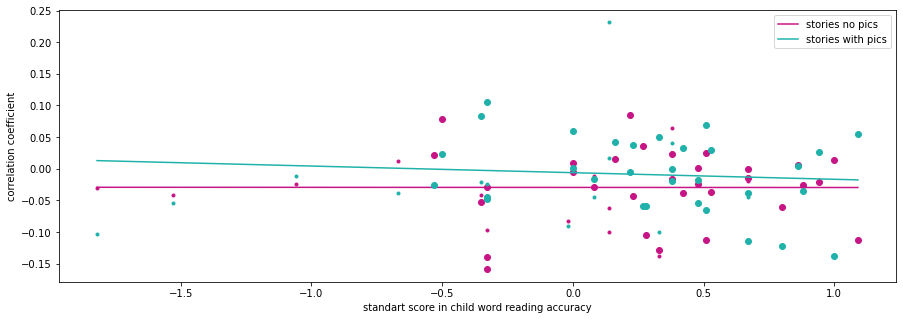

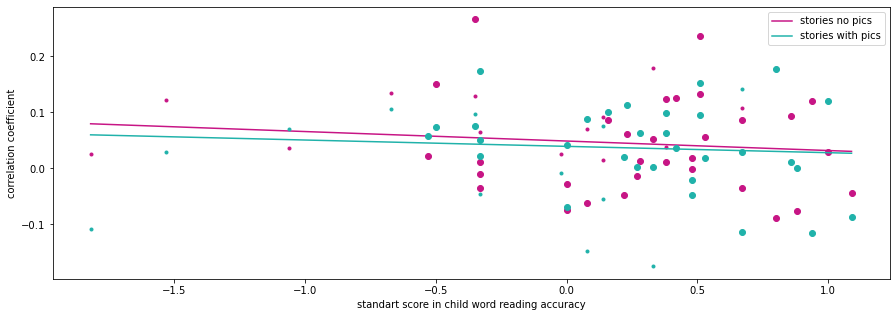

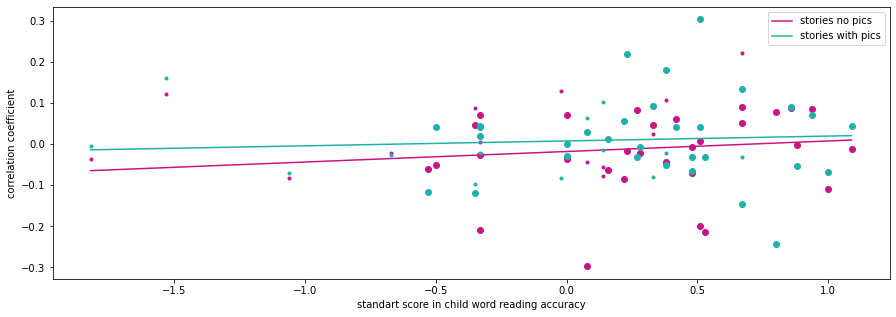

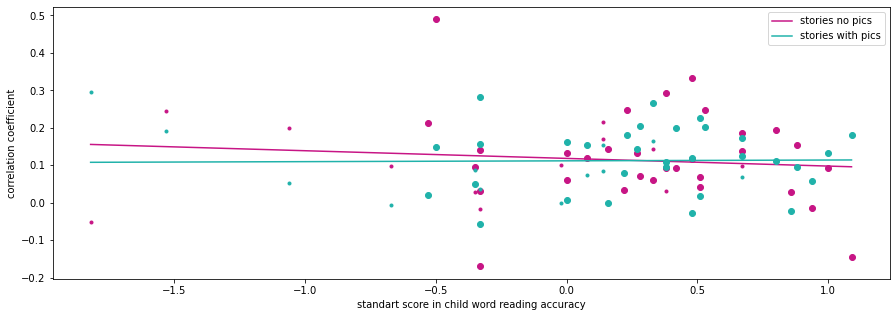

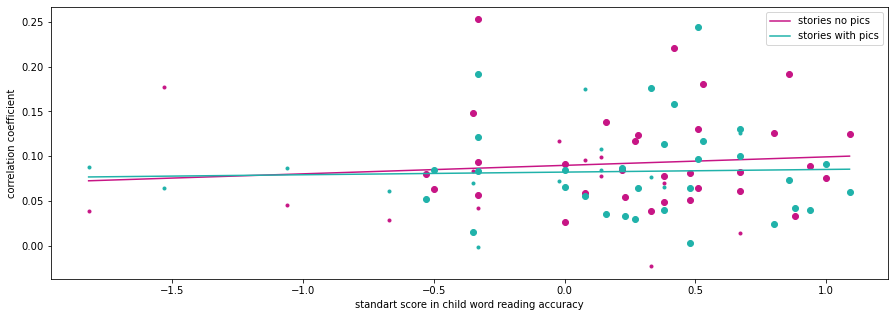

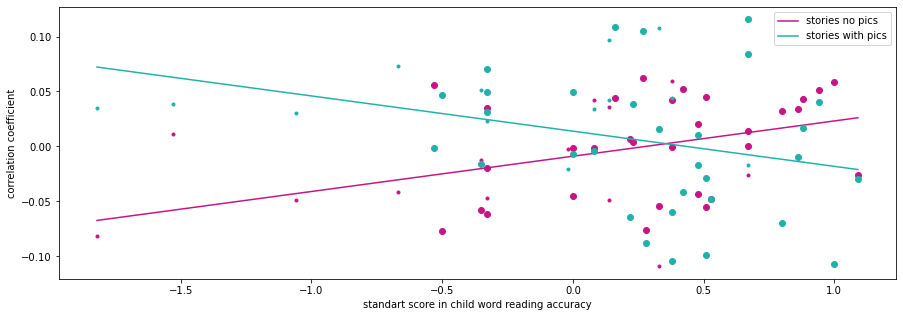

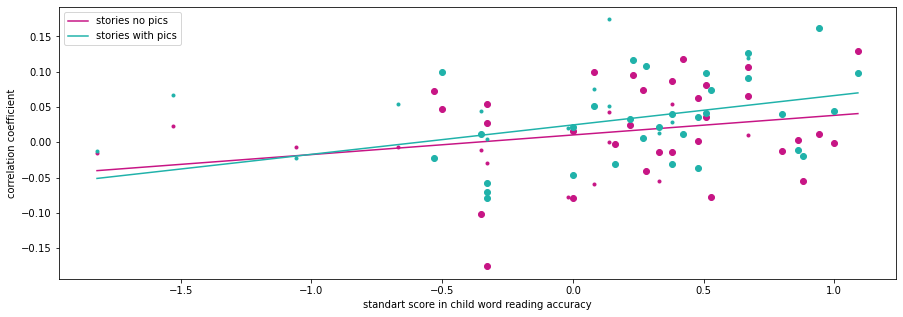

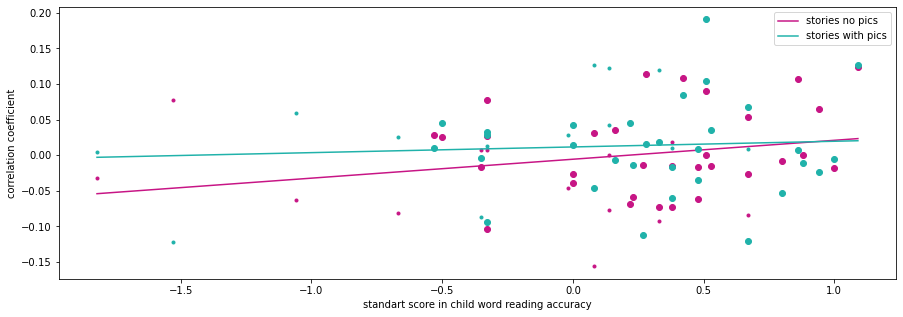

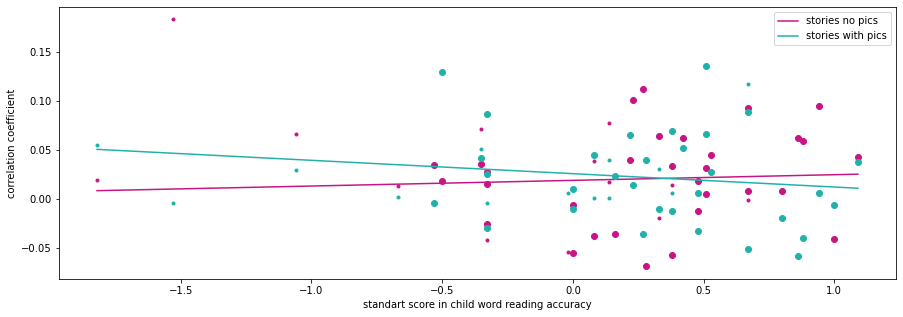

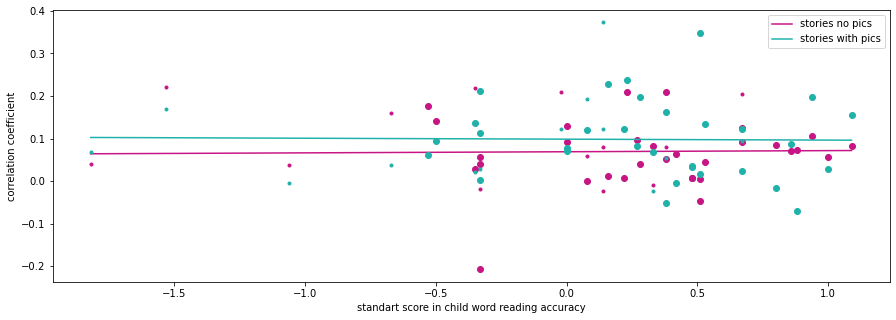

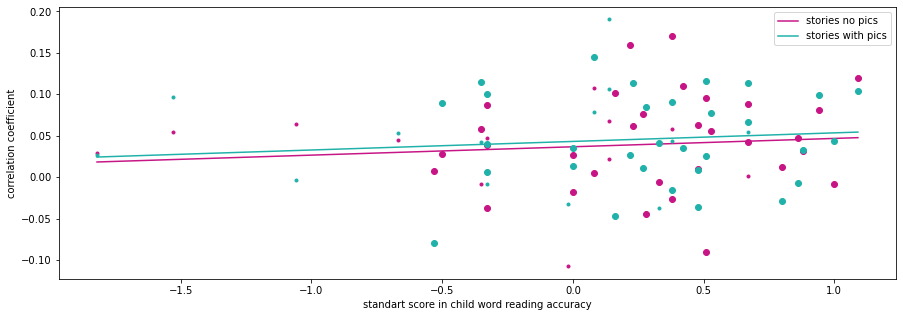

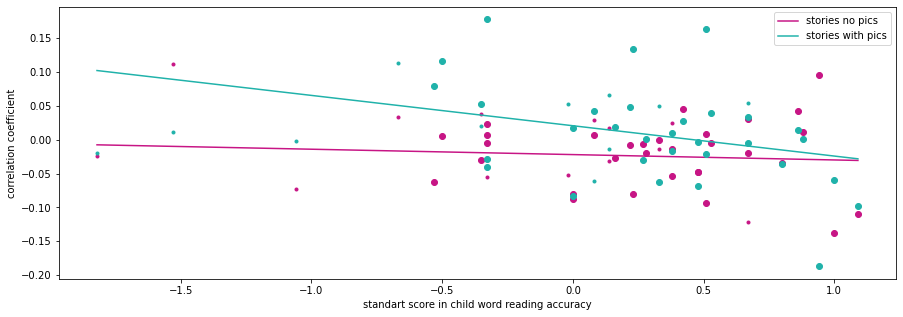

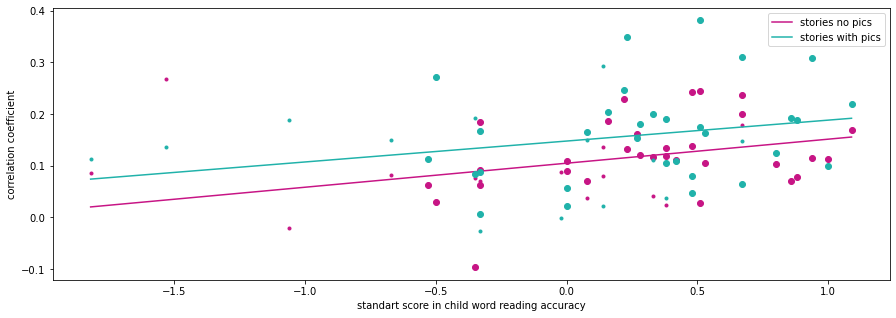

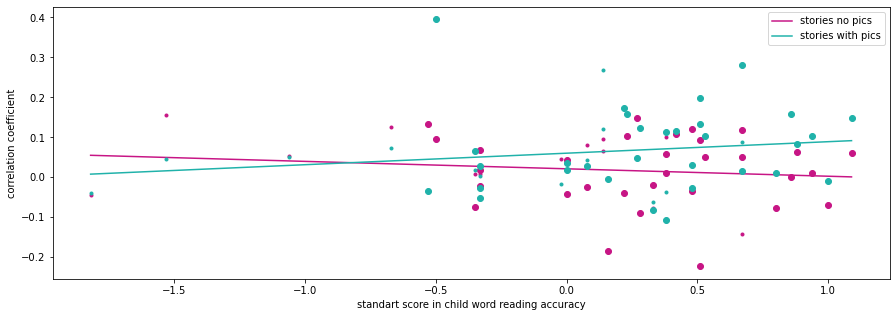

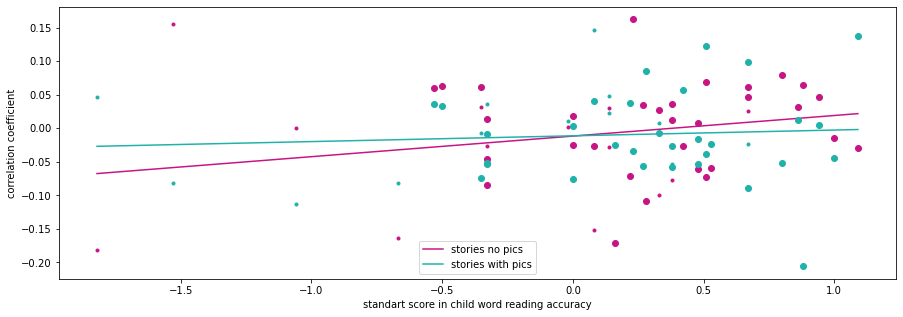

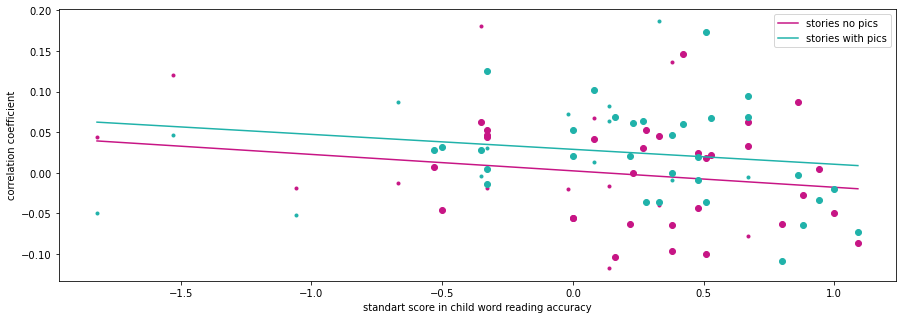

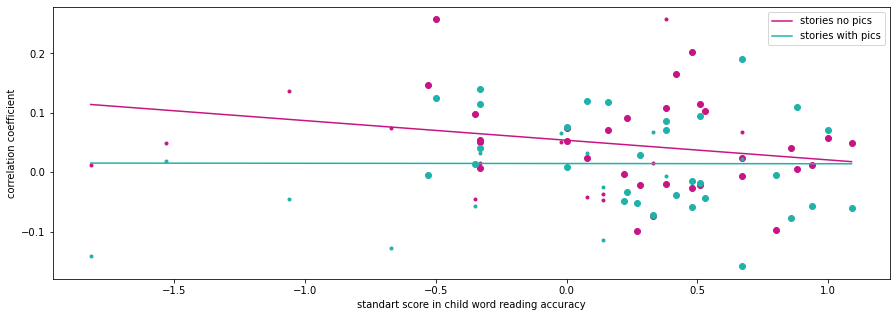

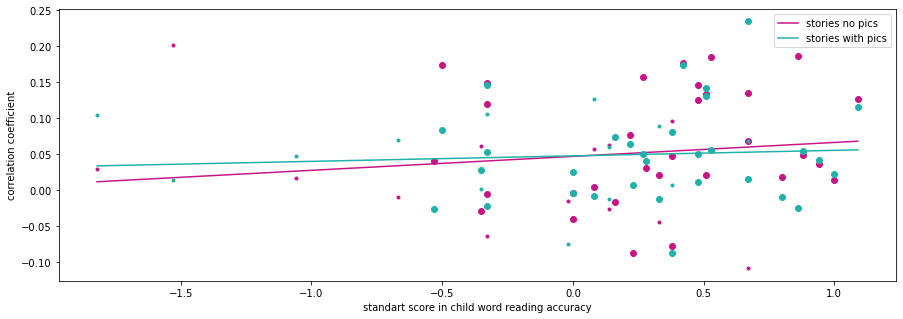

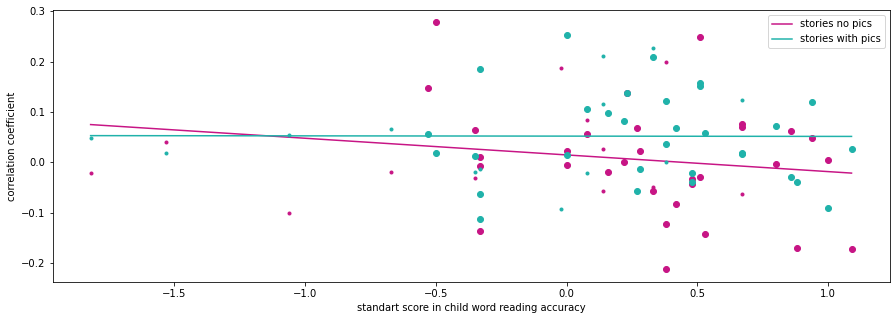

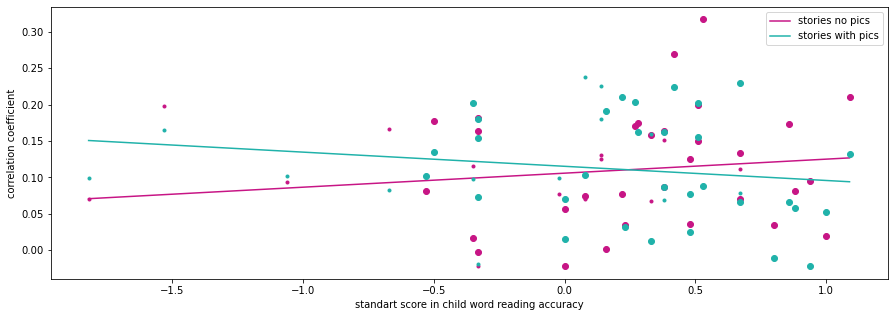

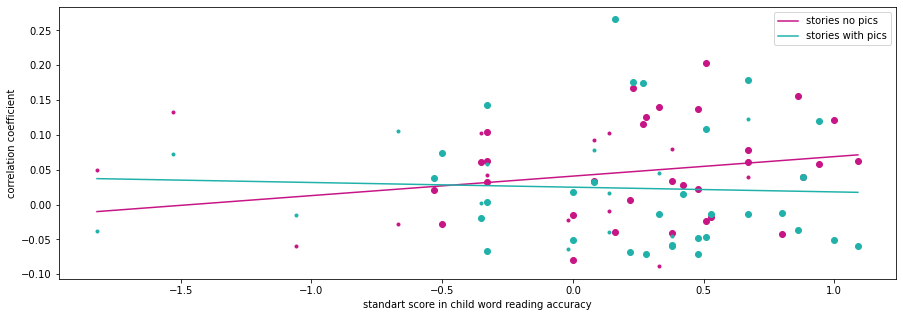

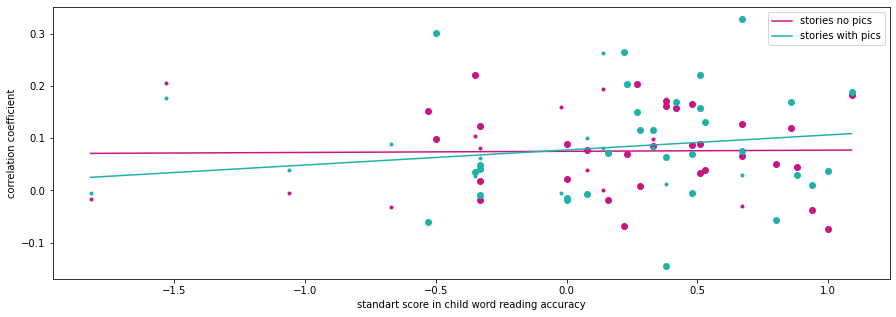

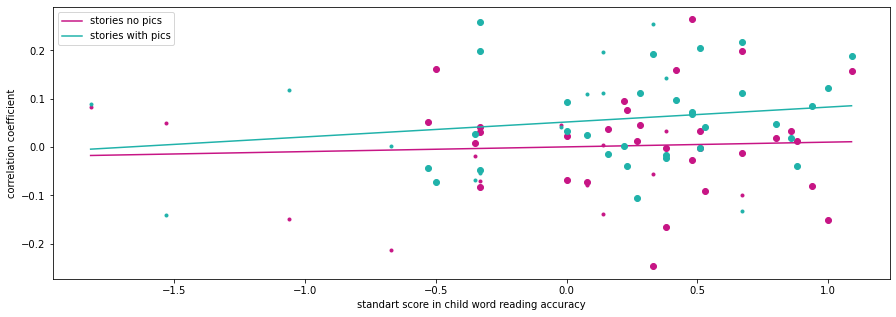

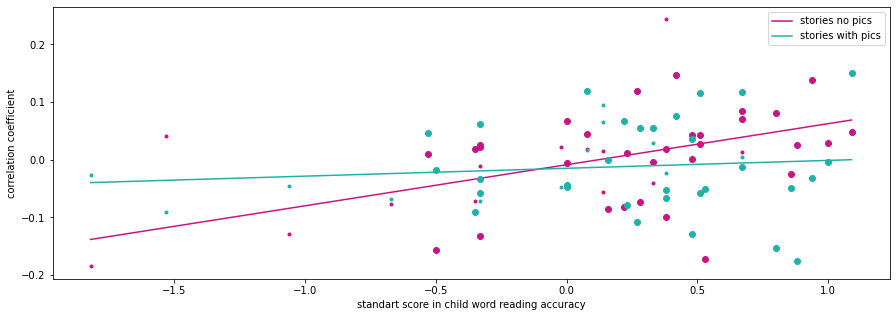

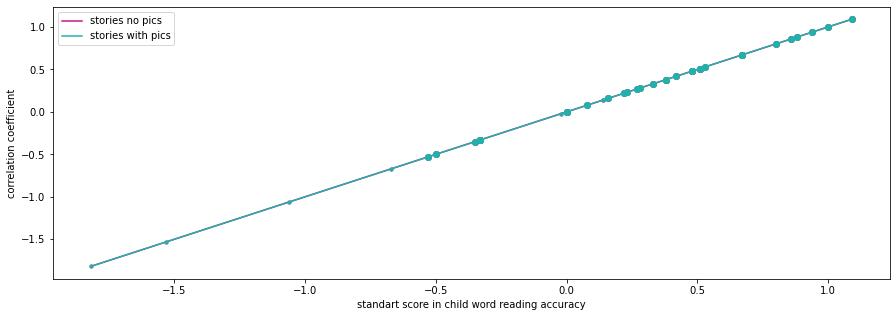

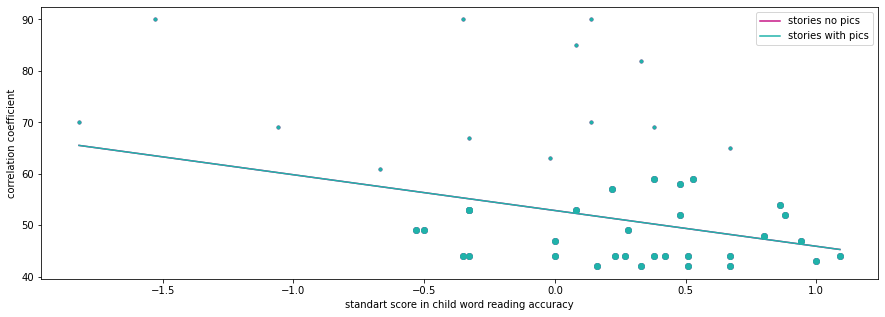

In [5]:
networks = df_task1_values.columns
coef_dict = []

for network in networks:
        
    one_column_task1 = df_task1_values.loc[:, network].to_numpy(dtype='float64')
    one_column_task2 = df_task2_values.loc[:, network].to_numpy(dtype='float64')
    
    for idx, test in enumerate(tests):
        test_data = tests_arr[idx]
        
        fig = plt.figure(figsize=(15,5))
        slope1, intercept1, r_squered1 = calc_plot_WLS(test_data, one_column_task1, weights, 'mediumvioletred', 'stories no pics')

        plt.xlabel(f'standart score in child word reading accuracy')
        plt.ylabel(f'correlation coefficient')


        slope2, intercept2, r_squered2 = calc_plot_WLS(test_data, one_column_task2, weights, 'lightseagreen', 'stories with pics')
        
        plt.xlabel(f'standart score in child word reading accuracy')
        plt.ylabel(f'correlation coefficient')
#         plt.title(f'{network}')
    
        corr = np.sqrt(abs(slope1*slope2))
        
        if slope1*slope2 < 0:
            corr = -corr

        plt.savefig(os.path.join(graphs_path, f'{network}_combined.tiff'))

### Distance vs tests

In [7]:
# graphs_path = os.path.join(main_path, 'graphs_distance_vs_reading_tests')
# if not os.path.exists(graphs_path):
#     os.mkdir(graphs_path)
    
# for idx, test in enumerate(tests):
#     test_data = tests_arr[idx]

#     plt.figure()
#     slope1, intercept1, r_squered1 = calc_plot_WLS(test_data, distance, weights)

#     plt.xlabel(f'{test}')
#     plt.ylabel(f'distance')
#     plt.title(f'Distance between tasks')
    

#     plt.savefig(os.path.join(graphs_path, f'{test}.jpeg'))

### Z vs tests

0.007835483237756735

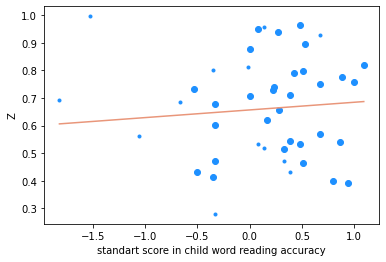

In [12]:
graphs_path_new = os.path.join(main_path, 'graphs_z_vs_reading_tests')
if not os.path.exists(graphs_path_new):
    os.mkdir(graphs_path_new)
    
for idx, test in enumerate(tests):
    test_data = tests_arr[idx]

    plt.figure()

    slope1, intercept1, r_squered1 = calc_plot_WLS(test_data, z_r, weights, color='darksalmon', label='z value')

    plt.xlabel(f'standart score in child word reading accuracy')
    plt.ylabel(f'Z')
#     plt.title(f'Fisher z transformation between tasks')

    plt.savefig(os.path.join(r'/Users/dariahasin/Documents/Final project/tiff_images', f'fisher_z_transformation.tiff'))
r_squered1

In [5]:
subjects_path = r'/Users/dariahasin/Documents/Technion/2022b/Final project/subjects'
task1_file = 'Task1_corr_matrix.xlsx'
task2_file = 'Task2_corr_matrix.xlsx'

networks = ['auditory', 'memory', 'salience', 'visual', 'DAN', 'DMN', 'FP', 'VAN']

task1_mat = np.zeros((len(networks), len(networks)))
task2_mat = np.zeros((len(networks), len(networks)))

subjects_list = [os.path.join(subjects_path, f) for f in os.listdir(subjects_path)]
counter = 0

for subject in subjects_list:
    if os.path.basename(subject).startswith('subject') and os.path.basename(subject) != 'subjects_heatmaps':
        counter += 1

        task1_path = os.path.join(subject, task1_file)
        task2_path = os.path.join(subject, task2_file)

        df_task1 = pd.read_excel(task1_path).iloc[:, 1:].to_numpy(dtype='float64')
        df_task2 = pd.read_excel(task2_path).iloc[:, 1:].to_numpy(dtype='float64')

        task1_mat += df_task1
        task2_mat += df_task2

task1_mat = task1_mat/counter
task2_mat = task2_mat/counter

task1_mean_df = pd.DataFrame(task1_mat, index=networks, columns=networks)
task2_mean_df = pd.DataFrame(task2_mat, index=networks, columns=networks)
task1_mean_df.to_excel(os.path.join(main_path, 'task1_mean_df.xlsx'))
task1_mean_df

,auditory,memory,salience,visual,DAN,DMN,FP,VAN
auditory,0.094952,0.075355,0.012060,0.110780,0.042438,0.089420,0.023955,0.050876
memory,0.075355,0.107323,0.003334,0.044328,0.050468,-0.005359,-0.018416,0.045875
salience,0.012060,0.003334,0.240485,0.000875,-0.009139,0.011531,0.111432,0.077788
visual,0.110780,0.044328,0.000875,0.422325,0.116077,-0.006035,-0.008670,-0.003255
DAN,0.042438,0.050468,-0.009139,0.116077,0.337023,-0.032217,0.072580,0.006112
DMN,0.089420,-0.005359,0.011531,-0.006035,-0.032217,0.183558,0.039026,0.110655
FP,0.023955,-0.018416,0.111432,-0.008670,0.072580,0.039026,0.227779,0.021395
VAN,0.050876,0.045875,0.077788,-0.003255,0.006112,0.110655,0.021395,0.336020


In [6]:
task2_mean_df.to_excel(os.path.join(main_path, 'task2_mean_df.xlsx'))
task2_mean_df

,auditory,memory,salience,visual,DAN,DMN,FP,VAN
auditory,0.092054,0.067173,0.020644,0.097361,0.031737,0.083145,0.022488,0.048211
memory,0.067173,0.114553,0.026469,0.009056,0.029118,0.012037,0.010707,0.021218
salience,0.020644,0.026469,0.264491,-0.013725,0.008268,0.035129,0.149525,0.082642
visual,0.097361,0.009056,-0.013725,0.330234,0.111539,0.014193,-0.008361,0.056483
DAN,0.031737,0.029118,0.008268,0.111539,0.343682,-0.011170,0.097370,0.051507
DMN,0.083145,0.012037,0.035129,0.014193,-0.011170,0.181416,0.046178,0.114148
FP,0.022488,0.010707,0.149525,-0.008361,0.097370,0.046178,0.236483,0.063405
VAN,0.048211,0.021218,0.082642,0.056483,0.051507,0.114148,0.063405,0.310727


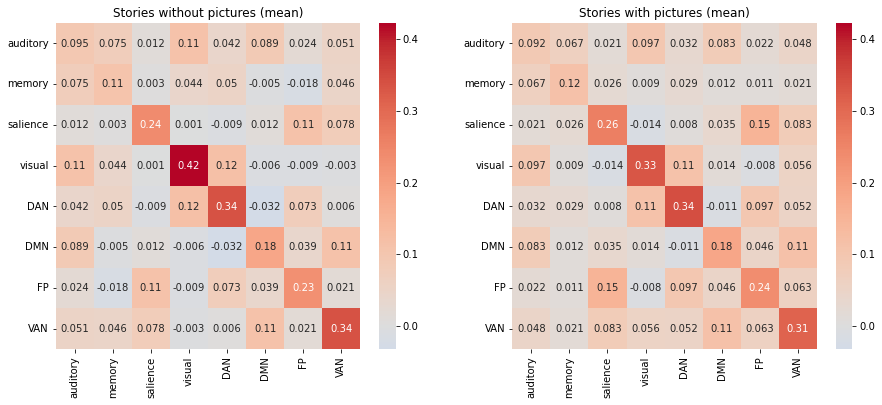

In [13]:
    vmax = np.max([np.max(task1_mean_df), np.max(task2_mean_df)])
    vmin = np.min([np.min(task1_mean_df), np.min(task2_mean_df)])
    
    fig = plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    task1_arr = task1_mean_df.to_numpy(dtype='float64')
    sns.heatmap(np.round(task1_arr, 3), xticklabels=networks, yticklabels=networks, annot=True, vmax=vmax, vmin=vmin, center=0, cmap='coolwarm')
    plt.title(f'Stories without pictures (mean)')
    
    plt.subplot(1,2,2)
    task2_arr = task2_mean_df.to_numpy(dtype='float64')
    sns.heatmap(np.round(task2_arr, 3), xticklabels=networks, yticklabels=networks, annot=True, vmax=vmax, vmin=vmin, center=0, cmap='coolwarm')
    plt.title(f'Stories with pictures (mean)')
    
    plt.savefig(os.path.join(r'/Users/dariahasin/Documents/Final project/tiff_images', f'mean_heatmaps.tiff'))

plt.show()

In [9]:
df_task1_values
df_task2_values
rpz_dict = {}

columns = df_task1_values.columns
for column in columns:
    one_column_task1 = df_task1_values.loc[:, column].to_numpy()
    one_column_task2 = df_task2_values.loc[:, column].to_numpy()
    r, p = pearsonr(one_column_task1, one_column_task2)
    z = np.arctanh(r)
    rpz_dict[f'{column}'] = {'r': r, 'p_value': p, 'z': z}
rpz_dict = pd.DataFrame.from_dict(rpz_dict)
rpz_dict.to_excel(os.path.join(main_path, 'p-values.xlsx'))
rpz_dict

/Users/dariahasin/opt/miniconda3/envs/bm-336546/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in arctanh
  # Remove the CWD from sys.path while we load stuff.


,auditory,memory,salience,visual,DAN,DMN,FP,VAN,auditory-memory,auditory-salience,...,memory_visual,VAN_auditory,VAN_DAN,VAN_DMN,VAN_memory,VAN_salience,VAN_visual,visual_salience,Child_WordReading_exact_SD_accuracy,Conners_Self_T_score
r,0.007255,0.122920,0.188618,-0.107142,0.197686,0.457572,0.279797,0.119588,0.176225,0.113431,...,0.124125,0.171519,-0.143598,0.239450,-0.054116,-0.076555,-0.121432,0.062871,1.000000,1.0
p_value,0.962720,0.426667,0.220133,0.488789,0.198344,0.001791,0.065847,0.439404,0.252511,0.463483,...,0.422114,0.265600,0.352407,0.117472,0.727176,0.621364,0.432329,0.685158,0.000000,0.0
z,0.007255,0.123545,0.190904,-0.107555,0.200323,0.494236,0.287462,0.120163,0.178084,0.113921,...,0.124768,0.173232,-0.144597,0.244190,-0.054169,-0.076706,-0.122034,0.062954,18.714974,inf


In [10]:
def corr_matrix(df_single_network, df_two_network):

    networks = list(df_single_network.columns)
    columns = df_two_network.columns
    subject_df = pd.DataFrame(index=networks, columns=networks)
     
    for column in columns:
        for network1 in networks:
            subject_df[network1][network1] = float(df_single_network[network1])
            for network2 in networks:
                if network1 in column and network2 in column and network1 != network2:
                    subject_df[network1][network2] = float(df_two_network[column])

    return subject_df

In [11]:
z_df = rpz_dict.iloc[2:3, :]
df_single_network = z_df.iloc[:, :8]
df_two_network = z_df.iloc[:, 8:]
df_all_z = corr_matrix(df_single_network, df_two_network)
z_arr = df_all_z.to_numpy(dtype='float64')
df_all_z.to_excel(os.path.join(main_path, 'coor_mat.xlsx'))
df_all_z

,auditory,memory,salience,visual,DAN,DMN,FP,VAN
auditory,0.007255,0.178084,0.113921,0.069225,0.019945,0.217412,-0.179544,0.173232
memory,0.178084,0.123545,0.061416,0.124768,0.052107,-0.110443,0.031569,-0.054169
salience,0.113921,0.061416,0.190904,0.062954,-0.074171,0.299304,0.100915,-0.076706
visual,0.069225,0.124768,0.062954,-0.107555,-0.125962,-0.1558,-0.349838,-0.122034
DAN,0.019945,0.052107,-0.074171,-0.125962,0.200323,-0.028838,0.055849,-0.144597
DMN,0.217412,-0.110443,0.299304,-0.1558,-0.028838,0.494236,0.224536,0.24419
FP,-0.179544,0.031569,0.100915,-0.349838,0.055849,0.224536,0.287462,0.123709
VAN,0.173232,-0.054169,-0.076706,-0.122034,-0.144597,0.24419,0.123709,0.120163


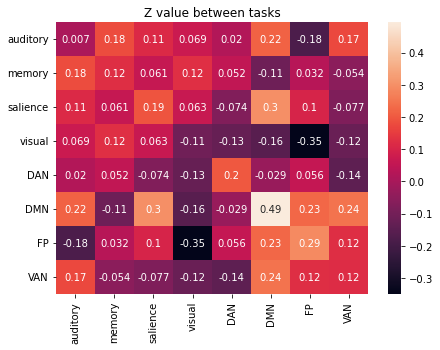

In [17]:
plt.figure(figsize=(7,5))
sns.heatmap(np.round(z_arr, 3), xticklabels=networks, yticklabels=networks, annot=True)
plt.title(f'Z value between tasks')
plt.show()

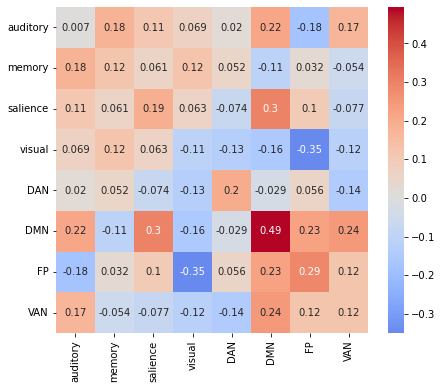

In [18]:
fig = plt.figure(figsize=(7,6))
sns.heatmap(np.round(z_arr, 3), xticklabels=networks, yticklabels=networks, annot=True, center=0, cmap='coolwarm')
plt.show()
fig.savefig(os.path.join(r'/Users/dariahasin/Documents/Final project/tiff_images', f'Z_value_between_tasks.tiff'))

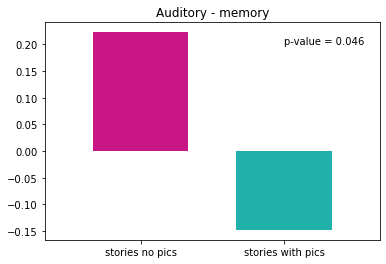

In [33]:
plt.bar([0.3, 0.6], 
        [0.223, -0.148],
        [0.2, 0.2], 
        color=['mediumvioletred', 'lightseagreen'], 
        tick_label=['stories no pics', 'stories with pics'], 
        
       )
plt.xlim([0.1, 0.8])
plt.title('Auditory - memory')
plt.text(0.6, 0.2, 'p-value = 0.046', color='black')
plt.show()


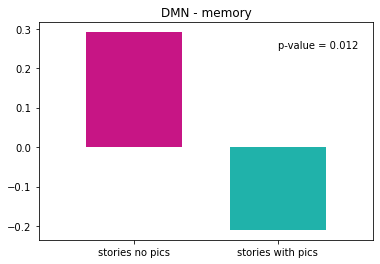

In [35]:
plt.bar([0.3, 0.6], 
        [0.291, -0.21],
        [0.2, 0.2], 
        color=['mediumvioletred', 'lightseagreen'], 
        tick_label=['stories no pics', 'stories with pics'], 
        
       )
plt.xlim([0.1, 0.8])
plt.title('DMN - memory')
plt.text(0.6, 0.25, 'p-value = 0.012', color='black')
plt.show()